In [1]:
import psycopg2
from sim_v1analysis_v2_config import local_host, local_name, local_port, local_user, v1_setup_json, simulation_iterations, real_results_sql
from creds import local_db_password
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import time

from sim_v1 import simulate

warnings.simplefilter('ignore')
conn = psycopg2.connect(dbname=local_name, user =local_user, host=local_host, password=local_db_password, port =local_port)
cur = conn.cursor()

fixture_id = 1035137


In [2]:
real_results_df = pd.read_sql(real_results_sql, conn)

In [10]:
def plot_results(real_df = None, fix_id=None):
    sim_df = simulate(fix_id, v1_setup_json, simulation_iterations, 'individual')
    row = real_df.loc[real_df['fixture_id']==fix_id]
    actual_diff = row['home_goal'] - row['away_goal']


    buckets = [x + 1 for x in range(-8,7)]
    q1, median, q3 = np.quantile(sim_df['home_goal'] - sim_df['away_goal'], [0.25, 0.5, 0.75])
    plt.hist(sim_df['home_goal'] - sim_df['away_goal'], bins=buckets)
    plt.axvline(q1, color='red', linestyle='dashed', linewidth=1, label='Q1')
    plt.axvline(median, color='green', linestyle='solid', linewidth=2, label='Median')
    plt.axvline(q3, color='orange', linestyle='dashed', linewidth=1, label='Q3')
    plt.axvline(actual_diff.values[0], color='black', linestyle='solid', linewidth=2, label='Q3')


    plt.show()
    print(real_df.loc[real_df['fixture_id']==fix_id])
    print(f"Quantiles: Q1 - {q1}, Median  - {median}, Q3 - {q3}, Mean - {np.mean(sim_df['home_goal'] - sim_df['away_goal'])}")
    print(f"median_test = {np.median(sim_df['home_goal'] - sim_df['away_goal'])}")


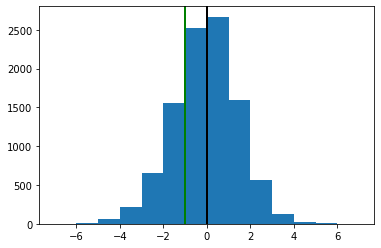

    fixture_id  team_home  team_away  home_goal  away_goal  home_shot  \
89     1035137         55         48          2          2         10   

    away_shot  home_passes  away_passes  home_dribble  away_dribble  
89         10          560          373            11             8  
Quantiles: Q1 - -1.0, Median  - -1.0, Q3 - 0.0, Mean - -0.5582
median_test = -1.0


In [11]:
plot_results(real_results_df, 1035137)